在开始介绍 pytorch 的一个使用语法结构前,我们先说一下 深度学习领域几位真正的大神,可以说深度学习领域的目前的产出都离不开这几位大神
Hinton, LeCun, Bengio

Hinton 杰弗里·埃弗里斯特·辛顿
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Geoffrey_Hinton_at_UBC.jpg/440px-Geoffrey_Hinton_at_UBC.jpg" style="zoom:50%;margin-left:0px" />

杰弗里·埃弗里斯特·辛顿 FRS（英语：Geoffrey Everest Hinton）（1947年12月6日－）是一位英国出生的加拿大计算机学家和心理学家，以其在神经网络方面的贡献闻名。辛顿是反向传播算法和对比散度算法的发明人之一，也是深度学习的积极推动者

后面两位就不细说了,总之都是很牛,可以说这三位以及他们的学生 点亮了深度学习领域的一盏明灯







### pytorch 基础及重要 api 介绍

首先 推荐优先使用虚拟环境,接下来我们准备安装依赖包 

```
pip3 install http://download.pytorch.org/whl/torch-0.3.1-cp36-cp36m-macosx_10_7_x86_64.whl 
pip3 install torchvision 
```

#### Tensor 张量
Pytorch 里面的基本对象就是张量 Tensor, 其表示的是已给多维的矩阵,其和 numpy 的数组是对应的 Tensor ,二者的区别就是 Pytorch 的 Tensor 可以运行在 GPU 上, TensorFlow 的 tensor 也是

依据数据类型 tensor 分一下几种
- torch.FloatTensor 32
- torch.DoubleTensor 64
- torch.shortTensor 16
- torch.IntTensor 32

下面我们给一些实例说明演示一下

In [1]:
import torch
a = torch.FloatTensor([[2,3], [4,8], [7,9]])
print("{}".format(a))
print("a size is {}".format(a.size()))


 2  3
 4  8
 7  9
[torch.FloatTensor of size 3x2]

a size is torch.Size([3, 2])


In [2]:
#使用 torch 创建全是 0 的张量
c = torch.zeros((3,2))
print("zero tensor:{}".format(c))

#随机初始化指定矩阵
d = torch.randn((3,2))
print("randn init the tensor:{}".format(d))

zero tensor:
 0  0
 0  0
 0  0
[torch.FloatTensor of size 3x2]

randn init the tensor:
-1.4649  0.4602
-0.0587 -0.3246
-0.4576  0.5864
[torch.FloatTensor of size 3x2]



In [3]:
import numpy as np
#与 numpy 互转
numpy_b = d.numpy()
print("conver to numpy is \n {}".format(numpy_b))
#np array conver to tensor
e = np.array([[2, 3], [4, 5]])
torch_e = torch.from_numpy(e)
print("the torch_e is : {}".format(torch_e))
print("the torch_e change data type is : {}".format(torch_e.float()))

conver to numpy is 
 [[-1.46490312  0.46020213]
 [-0.05871292 -0.32455546]
 [-0.45758563  0.58635259]]
the torch_e is : 
 2  3
 4  5
[torch.LongTensor of size 2x2]

the torch_e change data type is : 
 2  3
 4  5
[torch.FloatTensor of size 2x2]



#### Variable 
变量的本质其实和张量相同,只不过 torch 当中的变量可以自动求导,不过变量不会被放入计算图中, torch 的变量实在 torch.autograd.Variable 中 将一个 tensor 变成 Variable 很简单 只需要 Variable(a) 就可以了
> Variable 包含三个比较重要的组成属性: ***data*** , ***grad*** , ***grad_fn*** 通过 data 可以取出变量里面的张量数值, grad_fn 是计算梯度的操作,比如是通过加减还是乘除得来的,最后 grad 是反向传播的梯度

In [4]:
from torch.autograd import Variable

x = Variable(torch.Tensor([1]), requires_grad = True)
w = Variable(torch.Tensor([2]), requires_grad = True)
b = Variable(torch.Tensor([3]), requires_grad = True)
# Build a computational graph
y = w * x + b   # y = 2 * x +3

y.backward()

print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1

Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]

Variable containing:
 1
[torch.FloatTensor of size 1]



In [5]:
# 除了上面针对标量求导以外,我们还可以针对矩阵求导
x = torch.randn(3)
x = Variable(x, requires_grad=True)
y = x * 2
print("y:{}".format(y))
y.backward(torch.FloatTensor([1, 0.1, 0.01]))
print(x.grad)

y:Variable containing:
-3.3103
 1.2091
-0.7545
[torch.FloatTensor of size 3]

Variable containing:
 2.0000
 0.2000
 0.0200
[torch.FloatTensor of size 3]



#### 数据集
在处理任何机器学习问题之前都需要数据读取,并进行预处理. Pytorch 提供了很多工具使得数据的读取和预处理变得很容易.

torch.utils.data.DataSet 是代表这一数据的抽象类,你可以自己定义你的数据类继承 和 重写 这个抽象类, 你可以自己定义你的数据类继承 和重写这个抽象类,非常简单, 只需要定义 ***_ _len_ _*** ,***_ _getitem_ _*** 这两个列表,例如

In [6]:
from torch.utils.data import Dataset,DataLoader
class MyDataSet(Dataset):
    def __init__(self, csv_file, txt_file, root_dir, other_file):
        self.csv_file = csv_file
        with open(txt_file,'r') as f:
            data_list = f.readlines()
        self.txt_data = data_list
    
    
    def __len__(self):
        return len(self.csv_file)
    
    
    def __getitem__(self, idx):
        data = txt_data[idx]
        return data

In [7]:
# 批量迭代可以使用 
#dataiter = DataLoader(MyDataSet, batch_size=32, shuffle=True, collate_fn=default_collate)

#### 模组 nn.Module
在 pyTorch 里面编写神经网络,所有的层结构 和损失函数都来自于 torch.nn, 所有的模型都从这个基类继承而来  nn.Module

In [8]:
import torch
import torch.nn
class net_name(torch.nn.Module):
    def __init__(self, other_arguments):
        super("net_name", self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=None, out_channels=None, kernel_size=3)
        
        
    def forward(self, x):
        x = self.conv1
        return x

#### 模型的加载和保存
在 PyTorch里面使用 ***torch.save***来保存模型的结构和参数，有两种保存方式: 
- 保存整个模型的结构信息和参数信息，保存的对象是模型 model; 
- 保存模型的参数，保存的对象是模型的状态 model.state_dict() 可以这样保存， savc 的第 个参数是保存对象，第二个参数是保存路径及名称:
```torch.save(model , 'model.pth')``` 
```torch.save(model.state_dict(),'model_state.pth')```

加载模型有两种方式对应于保存模型的方式: 
- 加载完整的模型结构和参数信息，使用 loadmodel = torch.load('model.pth' ) ，在网络较大的时候加载的时间比较长，同时存储空间也比较大; -- 加载模型参数信息，需要先导人模型的结构，然后通过 model.load_state_dic(torch.load('model state.pth')) 来导入


#### 基于 pytorch 的一些简单应用

线性模型:通常就是给定很多个数据点,希望能够找到一个函数来拟合这些数据点,并使其误差最小,比如最简单的一元线性模型可以用

In [9]:
import numpy as np
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                  [9.779], [6.182], [7.59], [2.167], [7.042], 
                  [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76 ], [2.09], [3.19], [1.694], 
                     [1.573], [3.366], [2.596], [2.53], [1.221], [2.827],
                     [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

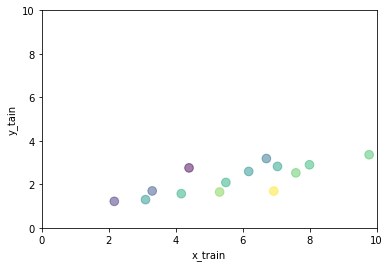

In [10]:
import matplotlib.pyplot as plt
plt.figure(1)#就在图表1中画图！
#
#plt1=plt.subplot(2,1,1)
T = np.arctan2(x_train,y_train) # for color value
# 散点图
plt.scatter(x_train, y_train, s=75, c=T, alpha=.5)
# 线图
#plt.plot(y_train,x_train,'.-')
plt.xlabel('x_train')
plt.xlim(0,10)
plt.ylim(0.00,10)
plt.ylabel('y_tain')
plt.show()

In [11]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1,1) #输入输出定义都是1维
    
    def forward(self, x):
        out = self.linear(x)
        return out

if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()
    
criterion = torch.nn.MSELoss() #定义均方差损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)#定义优化函数,这里使用梯度下降


In [12]:
#接下来我们开始训练我们的模型
from torch.autograd import Variable
num_epochs = 1000000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train)).cuda()
        target = Variable(torch.from_numpy(y_train)).cuda()
    else:
        inputs = Variable(torch.from_numpy(x_train))
        target = Variable(torch.from_numpy(y_train))
    # forward the forward gen the output
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    # 每次反向传播 都重新归零梯度 否则会梯度累加 造成不收敛
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1)%20000 ==0:
        print("Epoch:{}/{} loss:{} ".format(epoch, num_epochs, loss.data[0]))

Epoch:19999/1000000 loss:0.1689153015613556 
Epoch:39999/1000000 loss:0.1689152717590332 
Epoch:59999/1000000 loss:0.1689152717590332 
Epoch:79999/1000000 loss:0.168915256857872 
Epoch:99999/1000000 loss:0.168915256857872 
Epoch:119999/1000000 loss:0.168915256857872 
Epoch:139999/1000000 loss:0.1689152866601944 
Epoch:159999/1000000 loss:0.16891522705554962 
Epoch:179999/1000000 loss:0.1689152866601944 
Epoch:199999/1000000 loss:0.1689152866601944 
Epoch:219999/1000000 loss:0.16891522705554962 
Epoch:239999/1000000 loss:0.1689152866601944 
Epoch:259999/1000000 loss:0.16891522705554962 
Epoch:279999/1000000 loss:0.168915256857872 
Epoch:299999/1000000 loss:0.1689152717590332 
Epoch:319999/1000000 loss:0.16891524195671082 
Epoch:339999/1000000 loss:0.168915256857872 
Epoch:359999/1000000 loss:0.1689152717590332 
Epoch:379999/1000000 loss:0.16891522705554962 
Epoch:399999/1000000 loss:0.1689152866601944 
Epoch:419999/1000000 loss:0.16891521215438843 
Epoch:439999/1000000 loss:0.1689152568

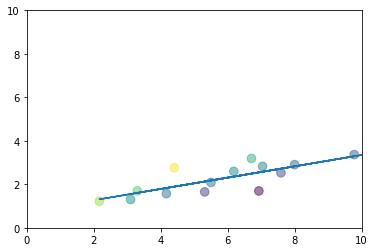

In [13]:
#做完训练之后我们简单预测一下结果
#将模型变成测试模式,这是因为有一些层操作如 
#Dropout 和 BatchNormalization 在训练和测试的时候是不一样的
model.eval() 
predict = model(Variable(torch.from_numpy(x_train)))
predict = predict.data.numpy()
plt.figure(2)#就在图表1中画图！
T = np.arctan2(y_train,x_train) # for color value
# 散点图
plt.scatter(x_train, y_train, s=75, c=T, alpha=.5)
plt.plot(x_train, predict, label = 'Fitting Line')
plt.xlabel="x"
plt.Ylabel="y"
plt.xlim(0,10)
plt.ylim(0.00,10)
plt.show()

#### 多项式回归
对于一般的线性回归,由于该函数拟合出来是一条直线,所以进度欠佳,我们可以考虑多项式回归,也就是提高每个属性的次数.而不再是使用一次去回归目标函数

原理和线性回归是一样的,只不过这里用的是高次多项式,而不是简单的一次线性多项式
我们这里设置参数方程
    y= b + w1*xz + w2*x^2 + 2.4*x^3
另外在 pytorch 里面使用 torch.cat() 来实现Tensor 的拼接,这里就不详细介绍了

#### 分类问题
    机器学习当中的监督学习主要分为回归问题和分类问题, 回归他希望预测的结果是连续的, 那么分类问题所所预测的结果就是离散的类别,他的输入可以是离散的,也可以是连续的  

#### 标准案例-手写数字图片识别

MNIST 数据集是一个手写字体数据集，包含O 到9 这10 个数字，其中有55000 张
训练集， 10000 张测试集.5000 张验证集，图片大小是28 x 28 的灰度罔，如图3.28所示

首先我们构建神经网络结构

In [14]:
import torch
from torch import  nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import torch.nn.functional as F

"""
导入构建网络结构的包 nn  和 学习优化器包 optimm
导入基础变量
导入数据加载工具
导入可视化工具
"""


'\n导入构建网络结构的包 nn  和 学习优化器包 optimm\n导入基础变量\n导入数据加载工具\n导入可视化工具\n'

In [15]:
#定义一些超参
batch_size=64
test_batch_size=1000
epochs=10
lr=0.01
momentum=0.5
no_cuda=True
seed=1
log_interval=10
cuda=torch.cuda.is_available()

In [16]:
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}


In [17]:
#自动下载手写图片的训练数据
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True, **kwargs)

我们构建一个简单的卷积神经网络,首先我们介绍一下 pytorch 里面的conv2d
`torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)`
http://pytorch.org/docs/master/nn.html

第一层卷积,将输入的 channel 放大10倍,主要 group 这里是指卷积任务怎么拆分,分几组,我们这里默认1 所有输入全部链接到输出
第二层我们将input channel 10 放大道20,
接下来我们添加 dropout 防止过拟合
最后我们进行两次全连接


```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #卷积后 h = [h+2*padding-dilation∗(kernel_size−1)−1]/stride + 1
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        #使用 dropout 防止过拟合
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
```

```python
model = Net()
if cuda:
    model.cuda()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
```

```python
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        if cuda:
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        test_loss += F.nll_loss(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, epochs + 1):
    train(epoch)
    test()
```

具体的 详细可执行代码可以参考 minist_cnn.py

#### cnn 卷积申请网络使用的一些简单总结

- 输入数据体的尺寸是W1* H1* D1 
- 4 个超参数:滤波器数量K ， 滤波器空间尺寸F ， 滑动步长S ， 零填充的数量P 即 D2=K 
- 输出数据体的尺寸为W2* H2* D2 ， 其中W2 = (w1+2P -F)/S+1 ， H2 = (H1+2P -F)/S+1
- 由于参数共享，每个滤波器包含的权重数目为 F*F*D1 ，卷积层→共有 F*F*D1 * K 个权重weight 和 bias
- 在输出体数据中，第d个深度切片( 空间尺寸是W2 X H2 ) ， 用第d 个滤波器和输入数据进行有效卷积运算的结果，再加上第d个偏置。
- 对于卷积神经网络的一些届参数，常见的设置是F=3 ， S=1 ， P=1 ，
- 多个小的滤波器组合要比一个大的滤波器更好,因为多个小的滤波器可以使用更少的参数并且每一个滤波器后面都可以添加激活函数,可以更好的表征图片

#### 池化
- 池化相对于卷积来说只是利用图片的不变性 使用简单的计算如最大特征 平均值 等进一步减少网络参数,减低计算复杂度
- 除了最大值池化之外，还有一些其他的池化函数，比如平均池化，或者L2 范数池化。在实际中证明，在卷积层之间引人最大池化的效果是最好的，而平均池化一般放在卷积神经网络的最后一层

#### 神经网络结构查看
直接使用 ```print(model)``` 可以查看神经网络结构
Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)
